# Adding a deviation survey to a well

Most wells are vertical, but many are not. All modern wells have a deviation survey, which is converted into a position log, giving the 3D position of the well in space. 

`welly` has a simple way to add a position log in a specific format, and computes a position log from it. You can use the position log to convert between MD and TVD. 

First, version check.

In [1]:
import welly
welly.__version__

'0.1.0'

## Make a well

First we'll read a LAS and instantiate a well `w`

In [2]:
from welly import Well
w = Well.from_las("data/las/P-129_out.LAS")
w

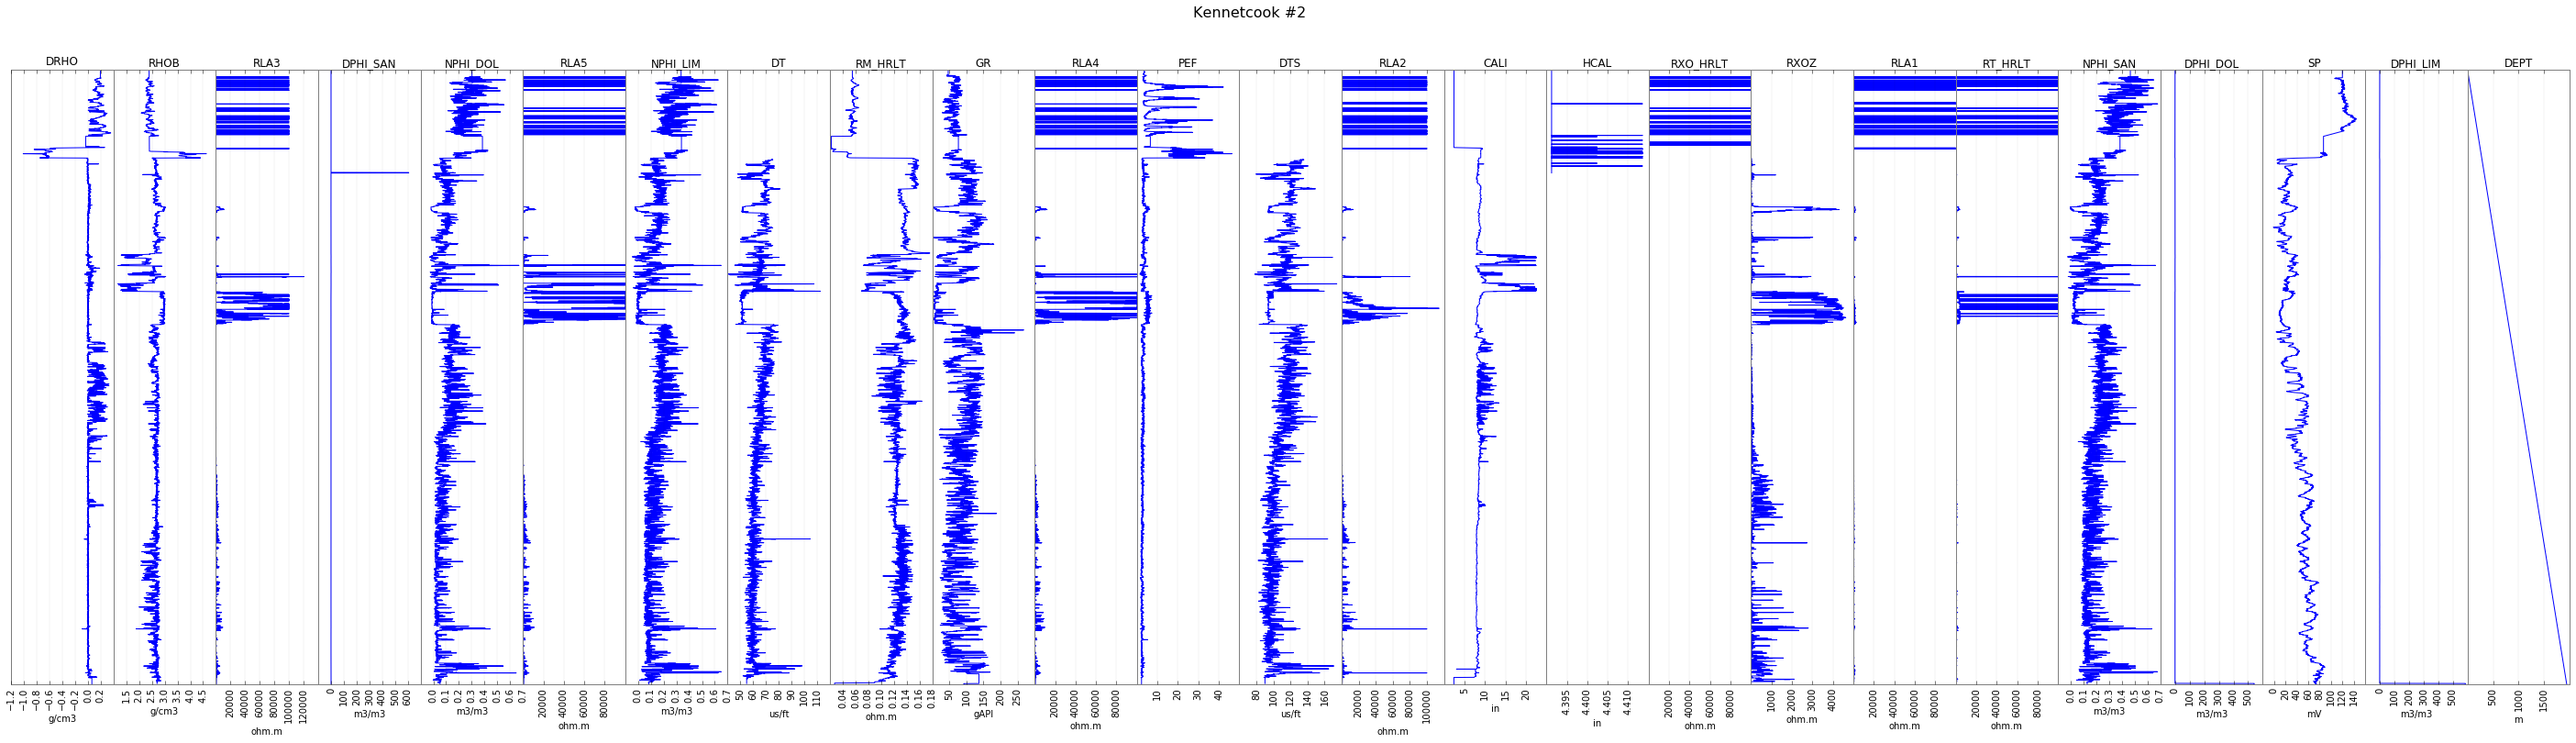

In [3]:
%matplotlib inline
w.plot()

## Add a position log

Assuming we have a CSV-like file containing columns like:

    MD, inclination, azimuth
    
...we can do the following:

In [4]:
import numpy as np

In [5]:
dev = np.loadtxt('data/deviation/P-129_deviation_survey.csv', delimiter=',', skiprows=9)
dev[:5]

array([[  32.  ,    0.64,    0.  ],
       [  63.  ,    0.34,    0.  ],
       [  91.  ,    0.29,    0.  ],
       [ 119.  ,    1.03,    0.  ],
       [ 149.  ,    1.22,    0.  ]])

You can use any other method to get to an array like this one.

Then we can add the deviation survey to the well's `location` attribute. This will automatically convert it into a position log, which is an array containing the *x*-offset, *y*-offset, and TVD of the well, in that order.

In [6]:
w.location.add_deviation(dev, td=1935)
w.location.position[:5]

array([[   0.        ,    0.        ,    0.        ],
       [   0.17871986,    0.        ,   31.99933456],
       [   0.44383184,    0.        ,   62.9981655 ],
       [   0.5977691 ,    0.        ,   90.99774146],
       [   0.92029657,    0.        ,  118.9956892 ]])

We also now have the methods `md2tvd` and `tvd2md` available to us:

In [7]:
w.location.md2tvd(1900)

array(1885.0587831139878)

## Implementation details

The position log is computed from the deviation survey with the minimum curvature algorithm, which is fairly standard in the industry. To use a different method, pass `method='aa'` (average angle) or `method='bt'` (balanced tangent) directly to `Location.compute_position_log()` yourself. 

Once we have the position log, we still need a way to look up arbitrary depths. To do this, we use a cubic spline fitted to the position log. This should be OK for most 'natural' well paths, but it might break horribly. If you get weird results, you can pass `method='linear'` to the conversion functions — less accurate but more stable.